## Importar librerias

In [53]:
import pandas as pd
import statistics as stc
import numpy as npy
import matplotlib.pyplot as plt
import plotly.express as px


In [22]:
FILENAME ='datasets/games_details.csv'

# columnas con las que se trabajaran
columns = ['GAME_ID',
          'TEAM_CITY',
          'PLAYER_NAME',
          'START_POSITION',
          'MIN',
          'OREB',
          'DREB',
          'REB',
          'AST',
          'BLK',
          'PF',
          'PTS',
          'PLUS_MINUS']

df = pd.read_csv(FILENAME, usecols =columns)

df.head()

,GAME_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,OREB,DREB,REB,AST,BLK,PF,PTS,PLUS_MINUS
0,22200477,San Antonio,Romeo Langford,F,18:06,1.0,1.0,2.0,0.0,0.0,5.0,2.0,-2.0
1,22200477,San Antonio,Jeremy Sochan,F,31:01,6.0,3.0,9.0,6.0,0.0,1.0,23.0,-14.0
2,22200477,San Antonio,Jakob Poeltl,C,21:42,1.0,3.0,4.0,1.0,0.0,4.0,13.0,-4.0
3,22200477,San Antonio,Devin Vassell,G,30:20,0.0,9.0,9.0,5.0,0.0,1.0,10.0,-18.0
4,22200477,San Antonio,Tre Jones,G,27:44,0.0,2.0,2.0,3.0,0.0,2.0,19.0,0.0


## Mostrar informacion basica del dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   GAME_ID         668628 non-null  int64  
 1   TEAM_CITY       668628 non-null  object 
 2   PLAYER_NAME     668628 non-null  object 
 3   START_POSITION  255765 non-null  object 
 4   MIN             558938 non-null  object 
 5   OREB            558938 non-null  float64
 6   DREB            558938 non-null  float64
 7   REB             558938 non-null  float64
 8   AST             558938 non-null  float64
 9   BLK             558938 non-null  float64
 10  PF              558938 non-null  float64
 11  PTS             558938 non-null  float64
 12  PLUS_MINUS      535277 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 66.3+ MB


## Describe los datos de manera estadististica

In [24]:
df.describe()

,GAME_ID,OREB,DREB,REB,AST,BLK,PF,PTS,PLUS_MINUS
count,6.686280e+05,558938.000000,558938.000000,558938.00000,558938.000000,558938.000000,558938.000000,558938.000000,535277.000000
mean,2.171771e+07,1.024212,3.033798,4.05801,2.103958,0.460339,1.999538,9.688218,-0.000488
std,5.656289e+06,1.397830,2.687384,3.48250,2.475476,0.860962,1.502963,8.082152,10.665573
min,1.030000e+07,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.070003e+07,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.120096e+07,1.000000,2.000000,3.00000,1.000000,0.000000,2.000000,8.000000,0.000000
75%,2.180014e+07,2.000000,4.000000,6.00000,3.000000,1.000000,3.000000,14.000000,6.000000
max,5.210021e+07,18.000000,25.000000,31.00000,25.000000,12.000000,15.000000,81.000000,57.000000


## Revisar la cantidad de datos nulos 

In [25]:
df.isnull()

,GAME_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,OREB,DREB,REB,AST,BLK,PF,PTS,PLUS_MINUS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,False,False,False,True,False,False,False,False,False,False,False,False,True
668624,False,False,False,True,False,False,False,False,False,False,False,False,True
668625,False,False,False,True,False,False,False,False,False,False,False,False,True
668626,False,False,False,True,False,False,False,False,False,False,False,False,True


In [26]:
df.isnull().sum().to_frame()

,0
GAME_ID,0
TEAM_CITY,0
PLAYER_NAME,0
START_POSITION,412863
MIN,109690
OREB,109690
DREB,109690
REB,109690
AST,109690
BLK,109690


## Se cambian los nombres de encabezados a minuscula

In [27]:
df.columns = df.columns.str.lower().str.strip()

In [28]:
df.head()

,game_id,team_city,player_name,start_position,min,oreb,dreb,reb,ast,blk,pf,pts,plus_minus
0,22200477,San Antonio,Romeo Langford,F,18:06,1.0,1.0,2.0,0.0,0.0,5.0,2.0,-2.0
1,22200477,San Antonio,Jeremy Sochan,F,31:01,6.0,3.0,9.0,6.0,0.0,1.0,23.0,-14.0
2,22200477,San Antonio,Jakob Poeltl,C,21:42,1.0,3.0,4.0,1.0,0.0,4.0,13.0,-4.0
3,22200477,San Antonio,Devin Vassell,G,30:20,0.0,9.0,9.0,5.0,0.0,1.0,10.0,-18.0
4,22200477,San Antonio,Tre Jones,G,27:44,0.0,2.0,2.0,3.0,0.0,2.0,19.0,0.0


In [29]:

df['player_name'].str.split(' ', expand = True)


,0,1,2,3
0,Romeo,Langford,None,None
1,Jeremy,Sochan,None,None
2,Jakob,Poeltl,None,None
3,Devin,Vassell,None,None
4,Tre,Jones,None,None
...,...,...,...,...
668623,Jordan,Hamilton,None,None
668624,Kenneth,Faried,None,None
668625,Kosta,Koufos,None,None
668626,Timofey,Mozgov,None,None


In [30]:
df['player_name'] = df['player_name'].str.rstrip()
df.head()

,game_id,team_city,player_name,start_position,min,oreb,dreb,reb,ast,blk,pf,pts,plus_minus
0,22200477,San Antonio,Romeo Langford,F,18:06,1.0,1.0,2.0,0.0,0.0,5.0,2.0,-2.0
1,22200477,San Antonio,Jeremy Sochan,F,31:01,6.0,3.0,9.0,6.0,0.0,1.0,23.0,-14.0
2,22200477,San Antonio,Jakob Poeltl,C,21:42,1.0,3.0,4.0,1.0,0.0,4.0,13.0,-4.0
3,22200477,San Antonio,Devin Vassell,G,30:20,0.0,9.0,9.0,5.0,0.0,1.0,10.0,-18.0
4,22200477,San Antonio,Tre Jones,G,27:44,0.0,2.0,2.0,3.0,0.0,2.0,19.0,0.0


In [31]:
df['player_name'].str.split()

0          [Romeo, Langford]
1           [Jeremy, Sochan]
2            [Jakob, Poeltl]
3           [Devin, Vassell]
4               [Tre, Jones]
                 ...        
668623    [Jordan, Hamilton]
668624     [Kenneth, Faried]
668625       [Kosta, Koufos]
668626     [Timofey, Mozgov]
668627          [Ty, Lawson]
Name: player_name, Length: 668628, dtype: object

## Jugadores a travez de los años que han estado en cada equipo

In [58]:
unique_players_by_team = df.drop_duplicates(subset=['team_city', 'player_name'])
unique_player_counts = unique_players_by_team.groupby('team_city').size().reset_index(name='unique_players')
unique_player_counts_sorted = unique_player_counts.sort_values(by='unique_players', ascending=False)
print(unique_player_counts_sorted.to_string(index=False))

                team_city  unique_players
              Los Angeles             382
              New Orleans             285
                Cleveland             282
                  Houston             276
                 New York             266
                  Atlanta             265
                  Memphis             259
               Sacramento             255
             Philadelphia             255
                   Dallas             255
                   Boston             247
                Milwaukee             244
                  Phoenix             242
             Golden State             240
               Washington             238
                Minnesota             233
                  Toronto             232
                    Miami             228
                  Chicago             228
                     Utah             226
                  Orlando             226
                 Portland             224
                Charlotte         

### Jugador con mas apariciones en el dataset

In [33]:
highest_source = df['player_name'].value_counts()
type(highest_source)

pandas.core.series.Series

In [34]:
highest_source.to_frame()

,count
player_name,
LeBron James,1795
Udonis Haslem,1720
Andre Iguodala,1560
Dwight Howard,1541
Kyle Korver,1534
...,...
Nate Williams,1
Anwar Ferguson,1
Jon Horford,1


## Agrupa por nombre de jugador y el total de puntos que ha anotado en el tiempo

In [60]:
total_points_by_player = df.groupby('player_name')['pts'].sum().reset_index()
print(total_points_by_player.to_string(index=False))

             player_name     pts
             A.J. Guyton     4.0
             A.J. Lawson    18.0
                AJ Green    60.0
              AJ Griffin   334.0
              AJ Hammons    82.0
                AJ Price  1832.0
             Aamir Simms     4.0
            Aaron Brooks  7141.0
             Aaron Craft    12.0
            Aaron Gordon  8075.0
              Aaron Gray  1237.0
          Aaron Harrison   119.0
             Aaron Henry    12.0
           Aaron Holiday  2198.0
           Aaron Jackson    13.0
             Aaron McKie   908.0
             Aaron Miles    60.0
           Aaron Nesmith   756.0
           Aaron Wiggins   631.0
          Aaron Williams   961.0
             Abdel Nader  1062.0
             Abdul Gaddy     4.0
                Acie Law   954.0
              Adam Chubb     2.0
            Adam Haluska    39.0
             Adam Mokoka    70.0
           Adam Morrison  1500.0
             Adam Parada    15.0
              Ade Murkey     0.0
         A

## Top 20 de los jugadores de la NBA con mas anotaciones en el tiempo

In [61]:
total_points_by_player_sorted = total_points_by_player.sort_values(by='pts', ascending=False)
top_20_players = total_points_by_player_sorted.head(20)
print(top_20_players.to_string(index=False))

      player_name     pts
     LeBron James 46638.0
     Kevin Durant 32327.0
  Carmelo Anthony 31658.0
     James Harden 28460.0
      Dwyane Wade 28102.0
    Dirk Nowitzki 27927.0
      Kobe Bryant 27287.0
Russell Westbrook 27180.0
    Stephen Curry 25826.0
       Chris Paul 25086.0
    DeMar DeRozan 23083.0
LaMarcus Aldridge 23023.0
    Dwight Howard 22494.0
      Joe Johnson 21774.0
      Tony Parker 21612.0
      Paul Pierce 21191.0
        Pau Gasol 20819.0
   Damian Lillard 20554.0
     Vince Carter 20404.0
       Tim Duncan 20177.0


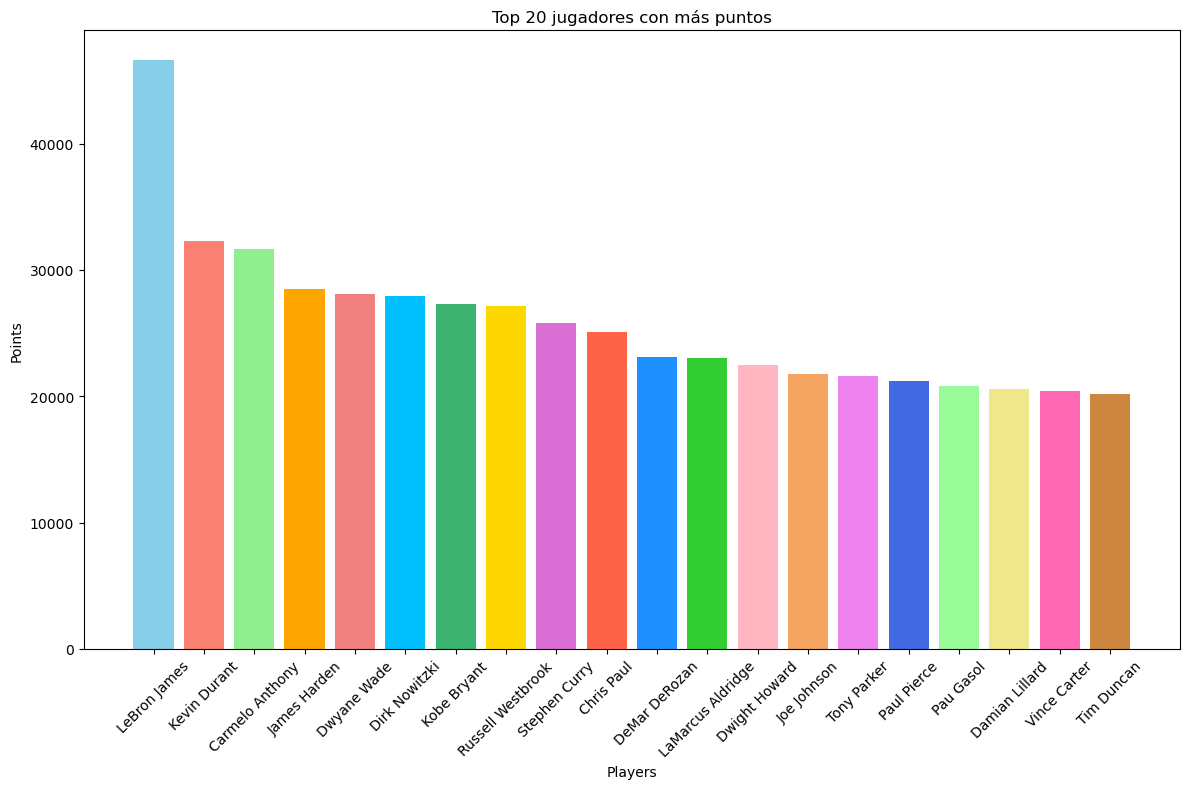

In [56]:

# Obtener los nombres de los jugadores y sus respectivos puntajes
players = top_20_players['player_name']
points = top_20_players['pts']

# Definir una lista de colores para cada barra
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral',
          'deepskyblue', 'mediumseagreen', 'gold', 'orchid', 'tomato',
          'dodgerblue', 'limegreen', 'lightpink', 'sandybrown', 'violet',
          'royalblue', 'palegreen', 'khaki', 'hotpink', 'peru']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(players, points, color=colors)


# Añadir título y etiquetas
plt.title('Top 20 jugadores con más puntos')
plt.xlabel('Players')
plt.ylabel('Points')

# Rotar los nombres de los jugadores para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico de barras
plt.tight_layout()
plt.show()

## Top 10 de los equipos mas anotadores

In [52]:
total_points_by_city = df.groupby('team_city')['pts'].sum().reset_index()
total_points_by_city_sorted = total_points_by_city.sort_values(by='pts', ascending=False)
top_10_cities = total_points_by_city_sorted.head(10)
# Imprimir el total de puntos anotados por team_city
print(top_10_cities)

       team_city       pts
13   Los Angeles  297683.0
9   Golden State  195194.0
1         Boston  191326.0
28   San Antonio  190787.0
15         Miami  189667.0
7         Denver  189364.0
25       Phoenix  187900.0
6         Dallas  187348.0
10       Houston  185594.0
5      Cleveland  182103.0


In [57]:
fig = px.sunburst(total_points_by_city, path=['team_city'], values='pts')
fig.update_layout(title_text='Puntos por Equipo')
fig.show()
